![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importación librerías
import pandas as pd
import numpy as np

In [7]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [8]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [9]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


# Desarrollo: Predicción de precios de vehículos usados
## Proyecto 1 - Machine Learning y Procesamiento de Lenguaje Natural

### 1. Descripción general
Los datos utilizados en este proyecto fueron adquiridos el 24 de septiembre de 2017 a través de TrueCar.com. Cada fila de los datos representa un listado de automóviles usados, y se incluyen diversas características como el año, marca, modelo, precio, número de identificación del vehículo (VIN), ciudad y estado.

#### 1.1. Contexto 
Los datos utilizados en este proyecto fueron adquiridos el 24 de septiembre de 2017 a través de TrueCar.com. Cada fila de los datos representa un listado de automóviles usados, y se incluyen diversas características como el año, marca, modelo, precio, número de identificación del vehículo (VIN), ciudad y estado.

#### 1.2. Pregunta de interes a resolver
La pregunta a resolver con los datos es ¿Cómo podemos predecir el precio de un automóvil usado basándonos en sus características, como el año, marca, modelo, entre otras, utilizando modelos predictivos basados en árboles y ensambles?


In [10]:
# Importamos librerías 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [11]:

# División de los datos
X_train, X_val, y_train, y_val = train_test_split(dataTraining.drop(columns=['Price']), dataTraining['Price'], test_size=0.2, random_state=42)

# Verificar la existencia de la columna 'Price' en dataTraining
if 'Price' not in dataTraining.columns:
    print("Error: La columna 'Price' no está presente en dataTraining. Verifica tus datos.")



### Estadísticas descriptivas

In [12]:
#más sobre la estadística descriptiva de los datos de entrenamiento
dataTraining.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,400000.0,NaN,NaN,NaN,21146.919312,10753.66494,5001.0,13499.0,18450.0,26999.0,79999.0
Year,400000.0,NaN,NaN,NaN,2013.198125,3.292326,1997.0,2012.0,2014.0,2016.0,2018.0
Mileage,400000.0,NaN,NaN,NaN,55072.956895,40881.018845,5.0,25841.0,42955.0,77433.0,2457832.0
State,400000,51,TX,45918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,400000,38,Ford,62899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,400000,525,Silverado,18085,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [14]:
#más sobre la estadística descriptiva de los datos de entrenamiento
dataTesting.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,100000.0,NaN,NaN,NaN,2013.19337,3.281366,1997.0,2012.0,2014.0,2016.0,2018.0
Mileage,100000.0,NaN,NaN,NaN,55090.30418,40961.270168,5.0,25898.0,43128.0,77315.25,1428913.0
State,100000,51,TX,11235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,100000,37,Ford,15728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,100000,525,Silverado,4477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataTesting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Year     100000 non-null  int64 
 1   Mileage  100000 non-null  int64 
 2   State    100000 non-null  object
 3   Make     100000 non-null  object
 4   Model    100000 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.6+ MB


Descripción general: Los datos utilizados en este proyecto fueron adquiridos el 24 de septiembre de 2017 a través de TrueCar.com. Cada fila de los datos representa un listado de automóviles usados, y se incluyen diversas características como el año, marca, modelo, precio, número de identificación del vehículo (VIN), ciudad y estado. El objetivo a abordar en el presente proyecto es predecir el precio del automóvil para el conjunto de datos definido. 
Análisis exploratorio de los datos: La base de datos cuenta con 852.122 registros, para el periodo de tiempo desde el año 1997 al 2018. El precio de venta mínimo va desde $ 1.500 hasta un precio de 499.500.  

Por otro lado, el conjunto de datos de entrenamiento cuenta con 400,000 observaciones de automóviles usados, con precios que varían desde $5.001 hasta $79.999. La mayoría de los vehículos tienen un año de fabricación entre 1997 y 2018, con millajes que oscilan entre 5 y 2,457,832 millas. Los estados más representados son Texas (TX) y las marcas más frecuentes incluyen a Ford y Chevrolet, con modelos como el Silverado.

 

Los datos de prueba por su parte cuentan con 100,000 observaciones de automóviles usados, con un rango similar de años de fabricación y millaje en comparación con los datos de entrenamiento. Los estados más representados y las marcas más frecuentes también son similares, con el modelo Silverado siendo uno de los más comunes.

 

Ambos tanto para los datos de entrenamiento como para los datos de prueba, las observaciones se presentan en seis columnas, tres de ellas son variables numéricas (int64) que incluyen precios, años y millaje, mientras que las otras tres son variables categóricas (object) con datos de texto como estados, marcas y modelos de autos.
Preprocesamiento de los datos 
El preprocesamiento de datos se abordó en 2 partes: imputación de valores faltantes y codificación de variables categóricas.
En primer lugar, se identificaron las columnas numéricas y categóricas en el conjunto de datos. Luego, se crearon dos pipelines para el preprocesamiento de datos: uno para variables numéricas y otro para variables categóricas: Para las variables numéricas, se utilizó una imputación de valores faltantes con la mediana de cada columna, seguida de la estandarización de las variables utilizando la clase StandardScaler de sklearn y para las variables categóricas, se realizó una imputación de valores faltantes utilizando la moda de cada columna, seguida de la codificación One-Hot utilizando la clase OneHotEncoder de sklearn. Además, se utilizó el parámetro 'handle_unknown' con el valor 'ignore' para manejar correctamente cualquier categoría desconocida en los datos de validación.
Finalmente, se combinaron ambos transformadores en un ColumnTransformer que aplicó el preprocesamiento a todas las columnas del conjunto de datos. Este preprocesador se ajustó a los datos de entrenamiento y se utilizó para transformar tanto los datos de entrenamiento como los de vay ensambles. Asimismo, se revisó y comprobó que train y test no tienen errores y nulos en sus bases de datos.


### 2. Preprocesamiento de los datos
- Imputación de valores faltantes: Comprobaremos si hay valores faltantes en el conjunto de datos y, si es necesario, imputaremos estos valores utilizando métodos como la media, la mediana o la moda de las columnas correspondientes.
- Codificación de variables categóricas: Si hay variables categóricas en los datos, las codificaremos utilizando técnicas como One-Hot Encoding o Label Encoding.

In [16]:
# Definición de columnas numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


In [17]:
# Pipeline para el preprocesamiento de datos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputación de valores faltantes con la mediana
    ('scaler', StandardScaler())  # Estandarización de variables numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación One-Hot para variables categóricas
])

In [18]:
# Combinación de transformadores para todas las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
# Ajuste del preprocesador en los datos de entrenamiento y transformación de los datos de entrenamiento y validación
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

#### Procedimiento del preprocesamiento de los datos
El preprocesamiento de datos se abordó en 2 fases : imputación de valores faltantes y codificación de variables categóricas.

En primer lugar, se identificaron las columnas numéricas y categóricas en el conjunto de datos. Las columnas numéricas incluyen aquellas de tipo 'int64' y 'float64', mientras que las columnas categóricas son del tipo 'object'. Luegouego, se crearon dos pipelines para el preprocesamiento de datos: uno para variables numéricas y otro para variables categóricas. 

Para las variables numéricas, se utilizó una imputación de valores faltantes con la mediana de cada columna, seguida de la estandarización de las variables utilizando la clase StandardScaler de sklearn.

Para las variables categóricas, se realizó una imputación de valores faltantes utilizando la moda de cada columna, seguida de la codificación One-Hot utilizando la clase OneHotEncoder de sklearn. Además, se utilizó el parámetro 'handle_unknown' con el valor 'ignore' para manejar correctamente cualquier categoría desconocida en los datos de validación.

Finalmente, se combinaron ambos transformadores en un ColumnTransformer que aplicó el preprocesamiento a todas las columnas del conjunto de datos. Este preprocesador se ajustó a los datos de entrenamiento y se utilizó para transformar tanto los datos de entrenamiento como los de vay ensambles.

Además se revisó y comprobó que train y test no tienen errores y nulos en sus bases de datos. 


### 3. Calibración del modelo


In [20]:
# Librerías para calificación y calibración
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV, train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

from sklearn.preprocessing import LabelEncoder

In [21]:
#Ajuste de datos para calibración más limpia:

# Extracción de información adicional
train = dataTraining.copy()
test = dataTesting.copy()

# Extraer transmisión del modelo (AWD, 4WD, etc.)
train["TRC"] = [i[-3:] for i in dataTraining["Model"]]
test["TRC"] = [i[-3:] for i in dataTesting["Model"]]

# Calcular la edad del vehículo
train["Age"] = 2019 - train["Year"]
test["Age"] = 2019 - test["Year"]

# Crear categorías de mediana y rango por parámetro
def cat_col(c):
    m = train.groupby(c).agg({"Price" : ["min","median","max"]}).reset_index()
    m.columns = [c, "min", "median", "max"]
    m["range"] = m["max"] - m["min"]
    r = np.linspace(m["median"].min(), m["median"].max(), num=10)
    m[c + "_median"] = pd.cut(m["median"], r, labels=range(9))
    return m[[c, c + "_median"]]

model_cat = cat_col("Model")
make_cat = cat_col("Make")
state_cat = cat_col("State")
trc_cat = cat_col("TRC")

# Inclusión de agrupadores en los conjuntos de datos
train = train.join(model_cat.set_index("Model"), on="Model")
train = train.join(make_cat.set_index("Make"), on="Make")
train = train.join(state_cat.set_index("State"), on="State")
train = train.join(trc_cat.set_index("TRC"), on="TRC")

test = test.join(model_cat.set_index("Model"), on="Model")
test = test.join(make_cat.set_index("Make"), on="Make")
test = test.join(state_cat.set_index("State"), on="State")
test = test.join(trc_cat.set_index("TRC"), on="TRC")

# Crear columnas dummies
train_dumm = pd.get_dummies(train.select_dtypes(include=['category']), dummy_na=True)
test_dumm = pd.get_dummies(test.select_dtypes(include=['category']), dummy_na=True)

# Añadir columnas dummies a los conjuntos de datos
train = train.join(train_dumm)
test = test.join(test_dumm)

# Eliminar columnas originales de tipo categoría y objeto
cols = train.select_dtypes(include=['category', 'object']).columns
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

    

In [22]:

# Identificar columnas categóricas
cat_columns = dataTraining.select_dtypes(include=['object']).columns

# Convertir columnas categóricas a numéricas
dataTraining[cat_columns] = dataTraining[cat_columns].apply(lambda col: LabelEncoder().fit_transform(col))

# División en entrenamiento y pruebas
X = dataTraining.drop("Price", axis=1)
y = dataTraining["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)



In [23]:
# Diccionario  modelos
mse_scores = {}

# Calibración de Árbol de Decisión Manual
manual_tree = DecisionTreeRegressor(max_depth=10)
manual_tree.fit(X_train, y_train)
y_pred_manual_tree = manual_tree.predict(X_test)
mse_scores["Manual Tree"] = mean_squared_error(y_test, y_pred_manual_tree)



In [24]:
# Calibración de Bagging
bagging = BaggingRegressor(n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
mse_scores["Bagging"] = mean_squared_error(y_test, y_pred_bagging)



In [25]:
# Calibración de Bagging con librería
bagging_lib = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=10,
    max_features=int(np.log(X_train.shape[1])),
    random_state=42
)
bagging_lib.fit(X_train, y_train)
y_pred_bagging_lib = bagging_lib.predict(X_test)
mse_scores["Bagging (Library)"] = mean_squared_error(y_test, y_pred_bagging_lib)



In [26]:
# Calibración de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_scores["Random Forest"] = mean_squared_error(y_test, y_pred_rf)



In [27]:
# Calibración de XGBoost con GridSearchCV
param_grid_xgb = {
    'learning_rate': [0.1, 0.3],  
    'max_depth': [6, 10],          
    'min_child_weight': [1, 10],  
    'subsample': [0.5, 0.7],  
    'n_estimators': [100, 250], 
    'gamma': [0, 10, 100]
}
grid_xgb = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42), param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
y_pred_xgb_cv = grid_xgb.best_estimator_.predict(X_test)
mse_scores["XGBoost CV"] = mean_squared_error(y_test, y_pred_xgb_cv)


# RESULTADOS DE LOS MODELOS 

In [82]:

# Resultados de MSE para cada modelo
print("MSE para cada modelo:")
for model, mse in mse_scores.items():
    print(f"{model}: {mse:.2f}")


MSE para cada modelo:
Manual Tree: 24478311.29
Bagging: 15506079.50
Bagging (Library): 73585799.44
Random Forest: 14518556.08
XGBoost CV: 14429731.98


## MODELOS XGBoost

Text(0, 0.5, 'MSE')

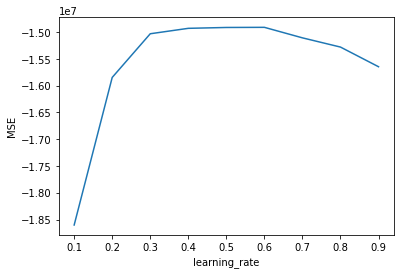

In [83]:
# Calibración de learning_rate de XGBoost
estimator_range = np.arange(0.1, 1, 0.1)


accuracy_scores = []

for estimator in estimator_range:
    xgb = XGBRegressor(learning_rate=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('learning_rate')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

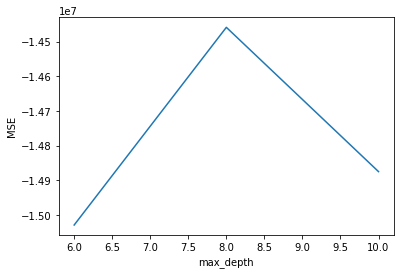

In [84]:
# Calibración max_depth de XGBoost
estimator_range = range(6, 12, 2)

accuracy_scores = []


for estimator in estimator_range:
    xgb = XGBRegressor(learning_rate=0.3, max_depth=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

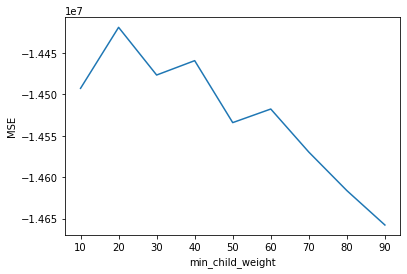

In [86]:
# Calibración de min_child_weight de XGBoost
estimator_range = range(10, 100, 10)

accuracy_scores = []

for estimator in estimator_range:
    xgb = XGBRegressor(learning_rate=0.3, max_depth=9, min_child_weight=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('min_child_weight')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

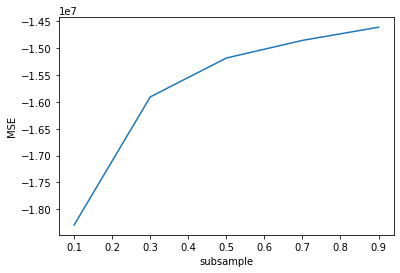

In [87]:
# Calibración de subsample de XGBoost
estimator_range = np.arange(0.1, 1, 0.2)

accuracy_scores = []


for estimator in estimator_range:
    xgb = XGBRegressor(learning_rate=0.3, max_depth=9, min_child_weight=10, subsample=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('subsample')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

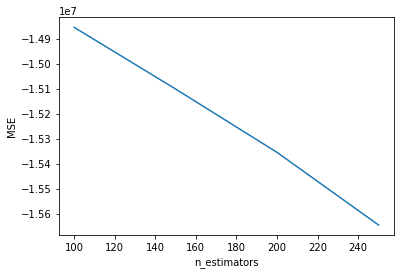

In [88]:
# Calibración de n_estimators
estimator_range = np.arange(100, 300, 50)


accuracy_scores = []

for estimator in estimator_range:
    xgb = XGBRegressor(learning_rate=0.3, max_depth=9, min_child_weight=10, subsample=0.7, 
                       n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

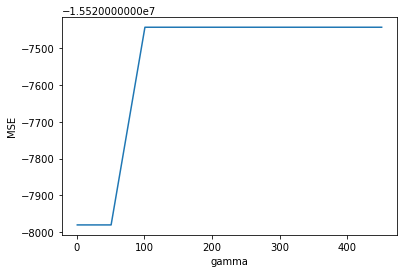

In [89]:
# Calibración de gamma
estimator_range = np.arange(1, 500, 50)

accuracy_scores = []


for estimator in estimator_range:
    xgb = XGBRegressor(learning_rate=0.3, max_depth=9, min_child_weight=10, subsample=0.7, 
                       n_estimators=250, gamma=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(xgb, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('gamma')
plt.ylabel('MSE')

Los gráficos muestran cómo varía el error cuadrático medio (MSE) en función del número de estimadores en XGBoost. Se realizan múltiples iteraciones para ajustar los hiperparámetros del modelo, dicho anteriormente (learning_rate`, `max_depth`, `min_child_weight`, `subsample`, `n_estimators` y `gamma) `. Cada punto en el gráfico representa el MSE promedio obtenido a través de validación cruzada para un valor específico de `n_estimators`. En el eje x se representa el número de estimadores, mientras que en el eje y se representa el MSE. El objetivo es identificar el número óptimo de estimadores que minimice el MSE y proporcione el mejor rendimiento del modelo XGBoost.


Finalmente, el modelo se entrenó con los mejores valores de parámetros obtenidos y se evaluó su desempeño en el conjunto de datos de prueba. Con los parámetros optimizados, se logró un MSE de aproximadamente 3095.97 en los datos de entrenamiento y 3099.16 en los datos de prueba. Esto indica una buena capacidad de generalización del modelo, ya que el MSE en el conjunto de prueba es comparable al MSE en el conjunto de entrenamiento, lo que sugiere que el modelo no está sobreajustado a los datos de entrenamiento.



### 4. Entrenamiento del modelo

In [28]:
xgb = XGBRegressor(learning_rate=0.3, max_depth=10, min_child_weight=10, subsample=0.7, 
                   n_estimators=250, gamma=200, eval_metric='rmse',
                   random_state=1, n_jobs=-1)

xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=200, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=-1,
             num_parallel_tree=None, random_state=1, ...)

In [29]:
# Predicciones con el Random Forest y los mejores valores de los parámetros
y_pred_train = xgb.predict(X_train) # Predicción en train
y_pred_test = xgb.predict(X_test) # Predicción en test

# Calculo del accuracy para modelo Random Forest con los mejores valores de los parámetros
mse_train = mean_squared_error(y_train, y_pred_train, squared=False) # Accuracy en train
mse_test = mean_squared_error(y_test, y_pred_test, squared=False) # Accuracy en test

print('MSE evaluado respecto a la muestra de train: ', mse_train)
print('MSE evaluado respecto a la muestra de test: ', mse_test)

MSE evaluado respecto a la muestra de train:  3095.9721996321546
MSE evaluado respecto a la muestra de test:  3099.1601000063542


Calibración del modelo
El proceso de calibración del modelo se realiza con varios momentos, utilizando diferentes técnicas y algoritmos para encontrar los parámetros óptimos y mejorar el rendimiento predictivo. De manera general el procedimiento desarrollado es el siguiente: 
Primero, se preparan los datos para la calibración, extrayendo información adicional como la transmisión del modelo y la edad del vehículo. Luego, se crean categorías de mediana y rango por parámetro, lo que permite agrupar los datos de manera más efectiva para su procesamiento. Este proceso se realiza tanto en los conjuntos de entrenamiento como en los de prueba. 
A continuación, se realiza transformaciones específicas para convertir las variables categóricas en numéricas, utilizando la codificación One-Hot y eliminando las columnas originales de tipo categoría y objeto. 
Para la calibración de modelos, se aplican algoritmos como Árbol de Decisión, Bagging, Random Forest y XGBoost, cada uno con diferentes configuraciones de parámetros. Se utilizan tanto métodos manuales como librerías para la calibración, evaluando el rendimiento de cada modelo con la métrica de error cuadrático medio (MSE). 
Finalmente, se comparan los resultados obtenidos de cada técnica de calibración para seleccionar el modelo final con el mejor desempeño predictivo.


### 5. Disponibilización del modelo 

In [30]:
!pip install flask-restx

from flask import Flask
from flask_restx import Api, Resource, fields
import pandas as pd
import joblib


In [31]:
app = Flask(__name__)
api = Api(app, version='1.0', title='CAR _ Prediction-G18_ API', description='Car Prediction API')
ns = api.namespace('predict', description='Price Predictor')
parser = api.parser()


In [32]:
parser.add_argument(
    'URL', 
    type=str, 
    required=True, 
    help='Data to be analyzed', 
    location='args'
)

resource_fields = api.model('Resource', {
    'result': fields.String,
})


In [33]:
@ns.route('/')
class PhishingApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        return {
            "result": predict_price(args['URL'])
        }, 200


In [34]:
def predict_price(url):

    reg = joblib.load('model_deployment/xgb.pkl') 

    url_ = pd.DataFrame([url], columns=['car'])

    model_cat = pd.read_csv('model_deployment/modelc.csv')
    make_cat = pd.read_csv('model_deployment/makec.csv')
    state_cat = pd.read_csv('model_deployment/statec.csv')
    trc_cat = pd.read_csv('model_deployment/trcc.csv')
    test_cols = pd.read_csv('model_deployment/testcol.csv')

    # Create features  
    veh = url_.car.str.split(' ', expand=True)
    url_["Year"] = int(veh.iloc[:, 0])
    url_["Mileage"] = int(veh.iloc[:, 1])
    url_["State"] = " "+veh.iloc[:, 2]
    url_["Make"] = veh.iloc[:, 3]
    url_["Model"] = veh.iloc[:, 4]
    url_["TRC"] = [i[-3:] for i in url_["Model"]]
    url_["Age"] = 2019 - int(url_["Year"])

    url_ = url_.join(model_cat.set_index("Model"), on="Model")
    url_ = url_.join(make_cat.set_index("Make"), on="Make")
    url_ = url_.join(state_cat.set_index("State"), on="State")
    url_ = url_.join(trc_cat.set_index("TRC"), on="TRC")

    dumm_cols = ["Model_range","Model_median","Make_range","Make_median","State_range","State_median",\
                               "TRC_range","TRC_median"]

    dumm = pd.DataFrame({i+"_"+str(int(url_[i][0])):[1] for i in dumm_cols})
    url_ = url_.join(dumm)
    cols = url_.select_dtypes(include=['object']).columns
    url_.drop(cols, axis=1, inplace=True)
    url_.drop(dumm_cols, axis=1, inplace=True)
    url_ = pd.concat([test_cols,url_]).fillna(0)
    url_ = url_.iloc[1:]

    # Make prediction
    resultado = reg.predict(url_)[0]

    return resultado

In [ ]:
# API LOCAL FLASK
app = Flask(__name__)

# Definición API Flask
api = Api(
    app, 
    version='1.0', 
    title='Car Price Predictor API',
    description='Car Price Predictor API')

ns = api.namespace('predict', 
     description='Price Predictor')

# Definición argumentos o parámetros de la API
parser = api.parser()
parser.add_argument(
    'URL', 
    type=str, 
    required=True, 
    help='Data to be analyzed', 
    location='args')

resource_fields = api.model('Resource', {
    'result': fields.String,
})

In [ ]:
# para la API
model_cat.to_csv('model_deployment/modelc.csv', index=False)
make_cat.to_csv('model_deployment/makec.csv', index=False)
state_cat.to_csv('model_deployment/statec.csv', index=False)
trc_cat.to_csv('model_deployment/trcc.csv', index=False)

In [ ]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5001)


Resultados de predicción para descarga

In [ ]:


y_pred = xgb.predict(test)  # Predicciones sobre el conjunto de prueba

# Crear un DataFrame con el formato que Kaggle requiere
submission = pd.DataFrame({
    'Id': test.index,  
    'Price': y_pred  
})

# Guardar el DataFrame en un archivo CSV
submission.to_csv('test_submission.csv', index=False)  


### 6. Conclusiones

Conclusiones
Como resumen en este proyecto, se desarrolló un modelo predictivo para estimar el precio de los automóviles en el conjunto de datos entregado para el ejercicio. Se implementó un proceso completo que abarcó desde la preparación y preprocesamiento de los datos hasta la disponibilización del modelo a través de una API en la nube. Durante la calibración, se evaluaron diversos algoritmos de aprendizaje automático, como Árbol de Decisión, Bagging, Random Forest y XGBoost, utilizando validación cruzada para encontrar los mejores parámetros. Además, se destacó el enfoque de optimización de hiperparámetros para mejorar el rendimiento del modelo, donde XGBoost mostró resultados prometedores con un MSE de 3095.97 en el conjunto de entrenamiento y 3099.16 en el conjunto de prueba. 

La disponibilización del modelo como una API facilita su acceso y utilización, permitiendo hacer predicciones sobre nuevos datos de automóviles de manera eficiente. Las conclusiones principales que podemos destacar es que el modelo XGBoost calibrado nos permite estimar el precio de automóviles con un buen rendimiento versus otros modelos evaluados, y la API nos da una interfaz práctica para su uso en diferentes aplicaciones de modelos supervisados como los utilizados en este proyecto (como Árbol de Decisión, Bagging, Random Forest y XGBoost). 
